In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('GoldPriceData.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
#print the last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#Number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
#geeting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
#checking the nuomber of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
#getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'], format='%m/%d/%Y')

In [14]:
#find the correlation of the dataframe
correlation = gold_data.corr()

In [15]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


<Axes: >

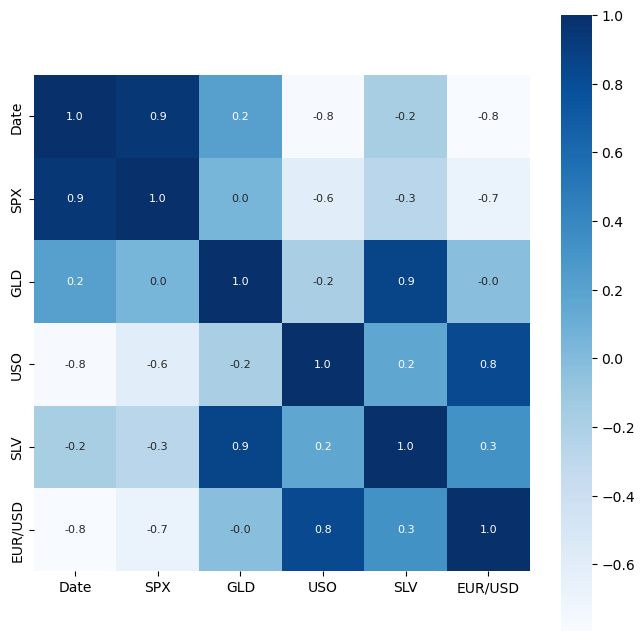

In [16]:
#constructing the heatmap to undertand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [17]:
#correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\sagar\AppData\Local\Temp\ipykernel_1692\567657995.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

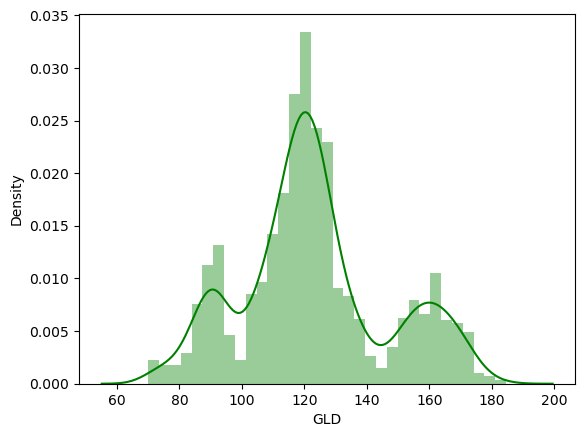

In [18]:
#Cheking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='green')

In [19]:
#Splitting the features and target
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [20]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [21]:
#Splitting into training and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
#Model training
#RandomForest Regressor
regressor = RandomForestRegressor(n_estimators=100)

In [24]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [25]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [26]:
print(test_data_prediction)

[168.20979922  81.84139993 116.28270066 127.67170077 120.60970123
 154.55329741 150.28129864 126.16450023 117.53789889 126.12280049
 116.61590122 172.19650085 141.10699833 167.84579819 115.34000004
 117.78780053 140.79850295 169.87630115 159.90440232 159.25399982
 155.12579993 125.15570028 176.48739908 156.85240377 125.21440028
  93.60629972  77.74320015 120.44659964 119.12769951 167.52919906
  88.15830047 125.11769983  91.12440072 117.65100036 121.14989905
 136.52509969 115.48920104 115.37190128 149.12700058 107.20040124
 104.28020253  87.14029798 126.43680043 118.11419971 153.38049854
 119.75490007 108.48759956 108.11989811  93.20490051 127.17079733
  75.31940023 113.6586993  121.45599986 111.16569922 118.71149892
 120.81009938 158.64830008 167.69340164 147.11529754  85.56539857
  94.14740018  86.86949866  90.53659986 118.99060081 126.40240087
 127.46909999 170.07659967 122.16289946 117.51399906  98.29500077
 167.41530197 143.28809896 132.28900221 121.23930209 121.45029976
 119.61840

In [27]:
#comparing the prediccted values to actual values
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)

In [28]:
print('R squared error : ',error_score)

R squared error :  0.9893454484936172


In [30]:
#compare the actual values and predicted values in a plot
Y_test = list(Y_test)

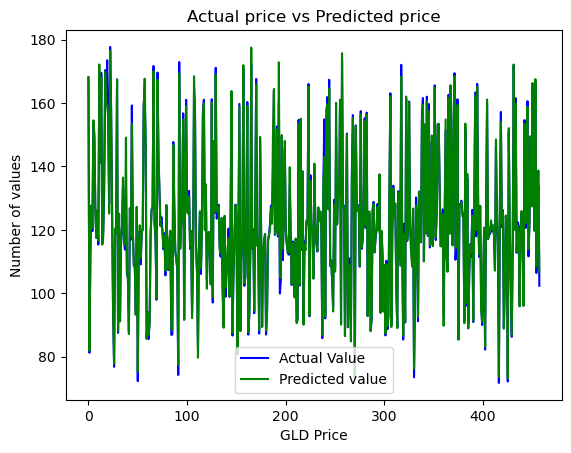

In [31]:
plt.plot(Y_test,color='Blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted value')
plt.title('Actual price vs Predicted price')
plt.xlabel('GLD Price')
plt.ylabel('Number of values')
plt.legend()
plt.show()
